In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [8]:
data = load_iris()
iris = pd.DataFrame(data= np.c_[data['data'], data['target']], columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target'])
iris['species'] = pd.Categorical.from_codes(data.target, data.target_names)
iris = iris.drop('target', 1)
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.loc[:, iris.columns != 'species'], iris.species, test_size=0.33, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [11]:
cross = pd.crosstab(predictions, y_test, margins=True)
print(cross)

species     setosa  versicolor  virginica  All
row_0                                         
setosa          19           0          0   19
versicolor       0          15          1   16
virginica        0           0         15   15
All             19          15         16   50


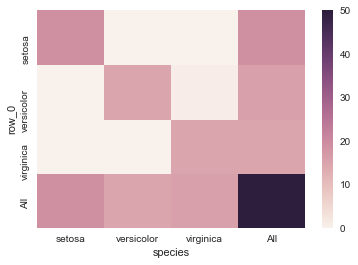

In [12]:
import seaborn as sns
%matplotlib inline
sns.heatmap(cross)

In [13]:
from sklearn.metrics import precision_score, recall_score
print("Precision score: {}".format(precision_score(y_test, predictions, average='macro')))
print("Recall score: {}".format(recall_score(y_test, predictions, average='macro')))

Precision score: 0.979166666667
Recall score: 0.979166666667
